Cost of each product:
[ 1. 55. 18.]
Model vector X for predicting product costs:
[ 1. 55. 18.]
The mean of Price column is 1560.663453815261 and the variance is 58732.365352539186
Mean of price considering only Wednesdays: 1550.7060000000001
Mean of price considering only April: 1698.9526315789474
Probability of Loss over the stock is 0.4979919678714859
Probability of Making a Profit on Wednesday is 0.08433734939759036
Probability of Making a Profit given that it is Wednesday 0.42


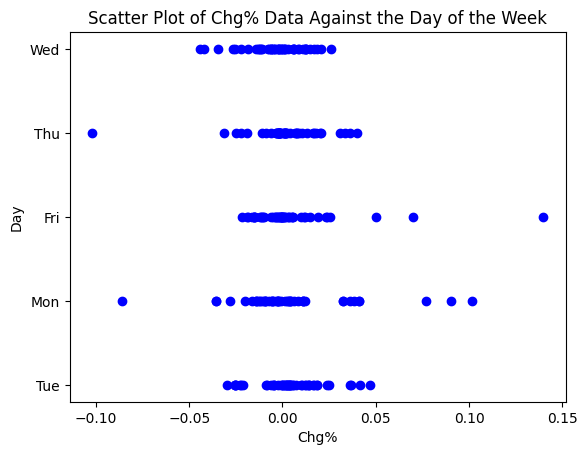

In [2]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt

# Load Purchase data
purchase_data = pd.read_excel('Lab Session1 Data.xlsx', sheet_name='Purchase data')

# Drop columns with missing values
purchase_data = purchase_data.dropna(axis=1)

# Extract input features (A) and target variable (C)
A = purchase_data.iloc[:, 1:4].to_numpy()
C = purchase_data.iloc[:, 4].to_numpy()

# Get the number of vectors
num_vectors = len(purchase_data)

# Calculate the rank of matrix A
rank_A = np.linalg.matrix_rank(A)

# Calculate the pseudo-inverse of A
A_inv = np.linalg.pinv(A)

# Compute product costs using the pseudo-inverse
product_costs = np.matmul(A_inv, C)

# Print product costs
print("Cost of each product:")
print(product_costs)

# Calculate model vector X for predicting product costs
model_vector_X = np.matmul(A_inv, C)

# Print model vector X
print("Model vector X for predicting product costs:")
print(model_vector_X)

# Create a new column 'rich/poor' based on Payment (Rs)
purchase_data['rich/poor'] = np.where(purchase_data['Payment (Rs)'] > 200, 'Rich', 'Poor')

# Load IRCTC Stock Price data
stock_price_data = pd.read_excel('Lab Session1 Data.xlsx', sheet_name='IRCTC Stock Price')

# Calculate mean and variance of Price column
mean_price = statistics.mean(stock_price_data['Price'])
variance_price = statistics.variance(stock_price_data['Price'])
print("The mean of Price column is", mean_price, "and the variance is", variance_price)

# Filter unique values in the 'Month' column
unique_months = stock_price_data['Month'].unique()

# Get descriptive statistics for the dataset
stock_price_stats = stock_price_data.describe()

# Calculate the mean of Price column considering only Wednesdays
mean_price_wed = stock_price_data[stock_price_data['Day'] == 'Wed']['Price'].mean()
print('Mean of price considering only Wednesdays:', mean_price_wed)

# Calculate the mean of Price column considering only April
mean_price_april = stock_price_data[stock_price_data['Month'] == 'Apr']['Price'].mean()
print('Mean of price considering only April:', mean_price_april)

# Calculate the probability of loss over the stock
total_records = len(stock_price_data)
loss_records = len(stock_price_data[stock_price_data['Chg%'] < 0])
probability_loss = loss_records / total_records
print("Probability of Loss over the stock is", probability_loss)

# Calculate the probability of making a profit on Wednesdays
profit_records_wed = len(stock_price_data[(stock_price_data['Day'] == 'Wed') & (stock_price_data['Chg%'] > 0)])
probability_profit_wed = profit_records_wed / total_records
print("Probability of Making a Profit on Wednesday is", probability_profit_wed)

# Calculate the probability of making a profit given that it is Wednesday
profit_records_wed = len(stock_price_data[(stock_price_data['Day'] == 'Wed') & (stock_price_data['Chg%'] > 0)])
wednesday_records = len(stock_price_data[stock_price_data['Day'] == 'Wed'])
probability_profit_given_wednesday = profit_records_wed / wednesday_records
print("Probability of Making a Profit given that it is Wednesday", probability_profit_given_wednesday)

# Create a scatter plot of Chg% Data against the Day of the Week
chg_perc = stock_price_data['Chg%']
days = stock_price_data['Day']
plt.scatter(chg_perc, days, color='blue', marker='o')
plt.xlabel('Chg%')
plt.ylabel('Day')
plt.title('Scatter Plot of Chg% Data Against the Day of the Week')
plt.show()
